# Decision Tree ICC Cricket Play

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/ICCPlayCricket-DecisionTree.csv')
df.head()

,MatchDay,Outlook,Temperature,Humidity,Wind,PlayCricket
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Overcast,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes


In [3]:
#Match day is not usefull so should be dropped
df.drop(['MatchDay'], axis=1, inplace=True)

In [5]:
X = df.iloc[:,:-1] #except last column
y = df.iloc[:,-1] #last column or df_encoded['PlayCricket']
X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform) # multicolumn encoding
X.head(20)
#labelencoder.fit_transform(df[['Outlook']])

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
'''
ohe = OneHotEncoder(categorical_features=[0,1]) # model will misunderstand 0 < 1 < 2. Overcome by OneHotEncoder
X = ohe.fit_transform(X).toarray()
X'''

In [14]:
df_result = pd.concat([X,y], axis=1)
df_result

,Outlook,Temperature,Humidity,Wind,PlayCricket
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes
5,1,0,1,0,No
6,0,0,1,0,Yes
7,2,2,0,1,No
8,2,0,1,1,Yes
9,1,2,1,1,Yes


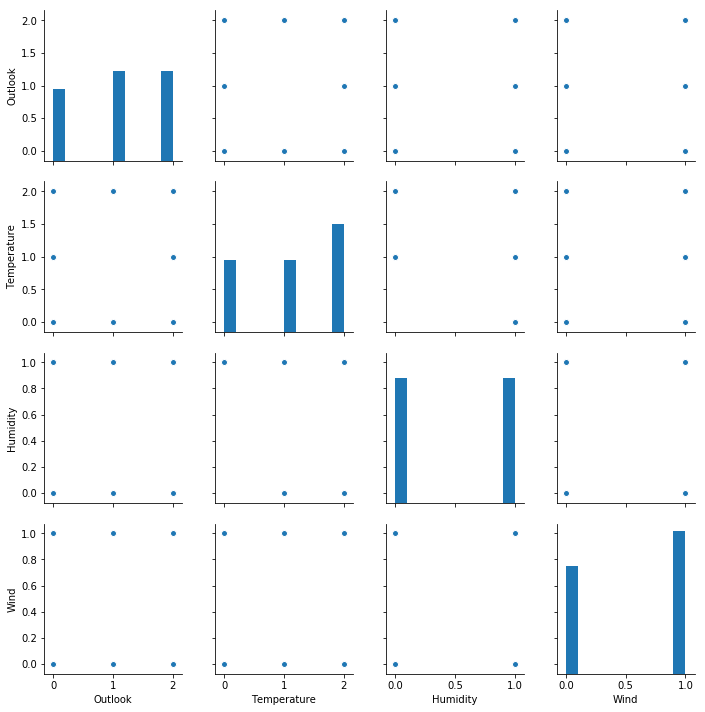

In [15]:
# to see pattern
sns.pairplot(data=df_result)

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

In [17]:
classifier = DecisionTreeClassifier(criterion ='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_pred = classifier.predict(X_test)

### Validation

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 1],
       [1, 1]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.50      0.50      0.50         2
        Yes       0.50      0.50      0.50         2

avg / total       0.50      0.50      0.50         4



### Visualization

In [22]:
#install
#conda install -c https://conda.binstar.org/sstromberg pydot
#conda install GraphViz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['Outlook', 'Temperature', 'Humidity', 'Wind']

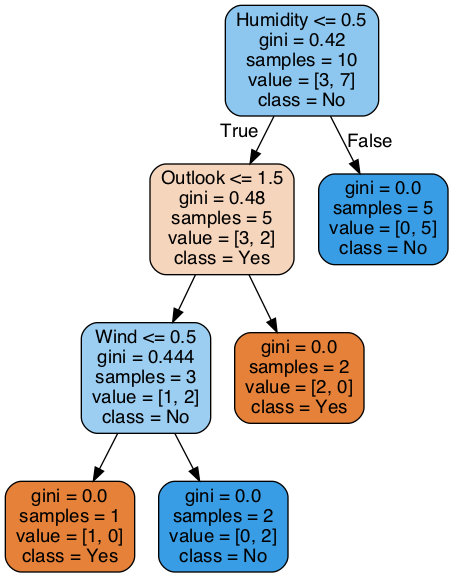

In [23]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,class_names=['Yes', 'No'],filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Manual steps

[Excel for calculation](/ICCPlayCricket-DecisionTree-ManualCalculationSteps.xlsx)

* Entropy(PlayCricket) = Sum -pi*LOG(pi)
* E(PlayCricket, Outlook) = P(Sunny)*E(3,2) + P(Overcast)*E(4,0) + P(Rain)*E(3,2)
* Gain(PlayCricket, Outlook) = E(PlayCricket) - E(PlayCricket, Outlook)

In [ ]:
Reference: 
    
[Decision Tree](https://www.saedsayad.com/decision_tree.htm)